## Cat- Dog Classification using SVM 

## Tutorial Available on Machine learning hub YouTube Channel

In [1]:
import os
os.chdir(r"E:\Cat-Dog Classification")
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sklearn import svm, metrics, datasets
from sklearn.utils import Bunch
from sklearn.model_selection import GridSearchCV, train_test_split

from skimage.io import imread
from skimage.transform import resize
import skimage

## Create the load images function

In [2]:
def load_image_files(container_path, dimension=(104, 104)):
    
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "Animal Classification using SVM"
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)

    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                 target=target,
                 target_names=categories,
                 images=images,
                 DESCR=descr)

In [3]:
image_dataset = load_image_files("E:/Cat-Dog Classification/animal/") #Load here dataset
print(image_dataset.target_names)

['Cat', 'Dog']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(image_dataset.data, image_dataset.target, test_size=0.3,random_state=0)
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [5]:
y_pred = clf.predict(X_test)

In [6]:
print(clf.score(X_test,y_test))

0.6234177215189873


In [7]:
print("Classification report for - \n{}:\n{}\n".format(
    clf, metrics.classification_report(y_test, y_pred)))

Classification report for - 
GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0):
              precision    recall  f1-score   support

           0       0.60      0.65      0.62       152
           1       0.65      0.60      0.62       164

    accuracy  

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[99 53]
 [66 98]]


In [10]:
print(y_pred)

[1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1
 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 0
 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1
 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1
 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 1 0
 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 1 1]


In [26]:
from PIL import Image
import os
def load_image(file):
    dimension=(104, 104)
    image = Image.open(file)
    flat_data = []
    img = skimage.io.imread(file)
    img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
    flat_data.append(img_resized.flatten()) 
    return image,flat_data

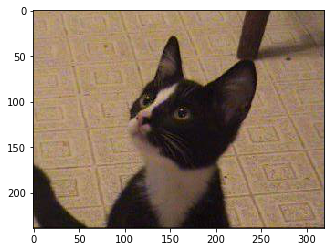

Predicted animal is Cat


In [28]:
plot , img = load_image('E:/Cat-Dog Classification/test_images/4.jpg')
%matplotlib inline
plt.imshow(plot)
plt.show()
k = image_dataset.target_names
p = clf.predict(img)
s = [str(i) for i in p] 
a = int("".join(s)) 
print("Predicted animal is", k[a])

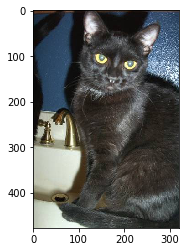

Predicted animal is Cat


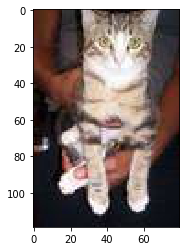

Predicted animal is Cat


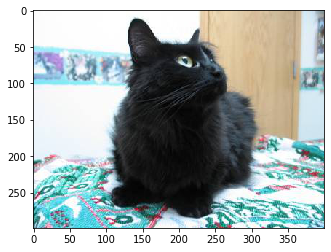

Predicted animal is Cat


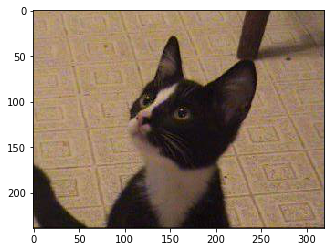

Predicted animal is Cat


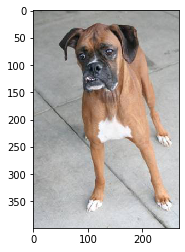

Predicted animal is Dog


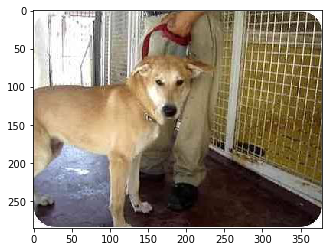

Predicted animal is Dog


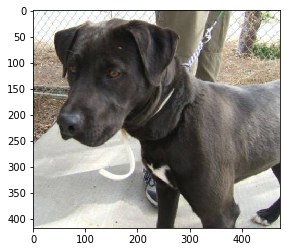

Predicted animal is Dog


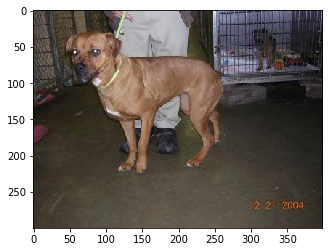

Predicted animal is Dog


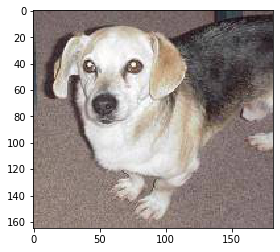

Predicted animal is Dog


In [30]:
import glob

for image in glob.glob("E:/Cat-Dog Classification/test_images/*.jpg"):

    plot , img = load_image(image)
    %matplotlib inline
    plt.imshow(plot)
    plt.show()
    k = image_dataset.target_names
    p = clf.predict(img)

    s = [str(i) for i in p] 
    a = int("".join(s)) 
    print("Predicted animal is", k[a])

## Create a Dumb file of Model, so you can use it on later

In [ ]:
import pickle
# now you can save it to a file
with open('classifier.pkl', 'wb') as f:
    pickle.dump(clf, f)

## Let's make a Application for Cat - Dog Classification